In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

### Importing Data and cleansing the Data

In [3]:
Diabetes = pd.read_csv("diabetes.csv")
print(Diabetes.head())
Diabetes.shape




   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


(768, 9)

### 1. Dealing With Missing Values:

In [4]:
# Count of the missing "0" value in columns whose absence might interfare our findings:
print((Diabetes[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] ==0).sum())

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64


In [219]:
# Replacing '0' values with their mean
# 1st step to do that, replace '0' values with 'NaN'
Diabetes[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = Diabetes[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0, np.NaN)
# Then filling up the NaN values with their column median values
Diabetes.fillna(Diabetes.median(), inplace = True)
print(Diabetes.head(10))

   Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin        BMI  \
0            6    148.0      72.000000       35.00000  155.548223  33.600000   
1            1     85.0      66.000000       29.00000  155.548223  26.600000   
2            8    183.0      64.000000       29.15342  155.548223  23.300000   
3            1     89.0      66.000000       23.00000   94.000000  28.100000   
4            0    137.0      40.000000       35.00000  168.000000  43.100000   
5            5    116.0      74.000000       29.15342  155.548223  25.600000   
6            3     78.0      50.000000       32.00000   88.000000  31.000000   
7           10    115.0      72.405184       29.15342  155.548223  35.300000   
8            2    197.0      70.000000       45.00000  543.000000  30.500000   
9            8    125.0      96.000000       29.15342  155.548223  32.457464   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   3

### 2. Visualization 

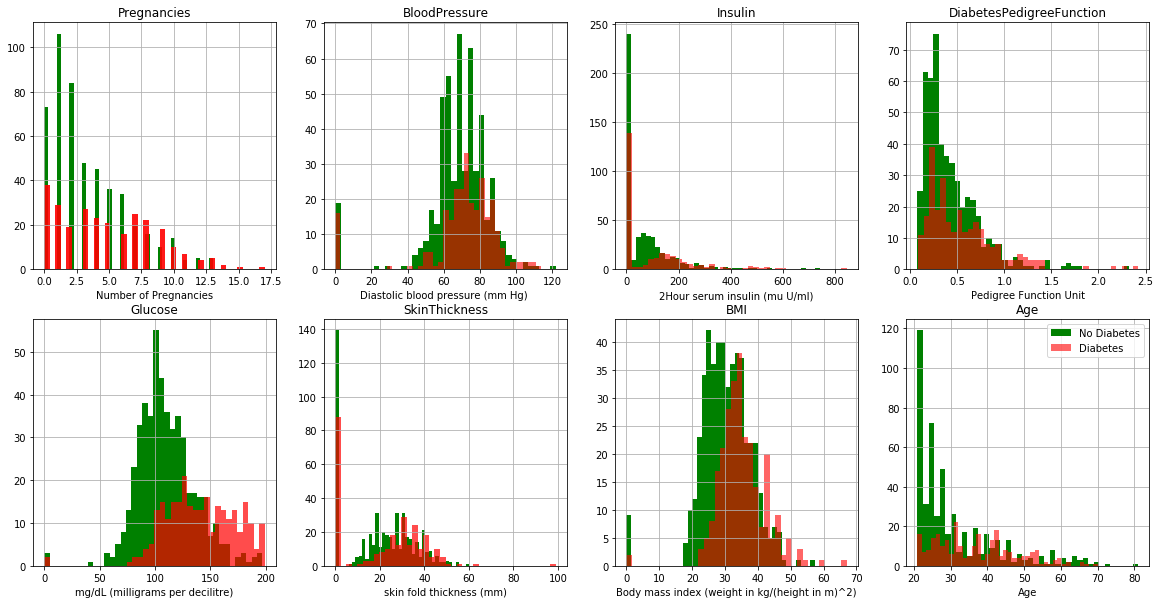

In [5]:
fig, ax = plt.subplots(2,4, figsize=(20,10))
Diabetes[Diabetes.Outcome==0]["Pregnancies"].hist(color ='green', bins= 40, ax=ax[0,0]).set(title = "Pregnancies", xlabel="Number of Pregnancies") 
Diabetes[Diabetes.Outcome==1]["Pregnancies"].hist(color ='red', bins = 40, alpha = 0.9, ax=ax[0,0])

Diabetes[Diabetes.Outcome==0]["Glucose"].hist(color ='green', bins= 40, ax=ax[1,0]).set(title = "Glucose", xlabel="mg/dL (milligrams per decilitre)") 
Diabetes[Diabetes.Outcome==1]["Glucose"].hist(color ='red', bins = 40, alpha = 0.7, ax=ax[1,0])

Diabetes[Diabetes.Outcome==0]["BloodPressure"].hist(color ='green', bins= 40, ax=ax[0,1]).set(title = "BloodPressure", xlabel="Diastolic blood pressure (mm Hg) ") 
Diabetes[Diabetes.Outcome==1]["BloodPressure"].hist(color ='red', bins = 40, alpha = 0.6, ax=ax[0,1])

Diabetes[Diabetes.Outcome==0]["SkinThickness"].hist(color ='green', bins= 40, ax=ax[1,1]).set(title = "SkinThickness", xlabel="skin fold thickness (mm)") 
Diabetes[Diabetes.Outcome==1]["SkinThickness"].hist(color ='red', bins = 40, alpha = 0.7, ax=ax[1,1])

Diabetes[Diabetes.Outcome==0]["Insulin"].hist(color ='green', bins= 40, ax=ax[0,2]).set(title = "Insulin", xlabel="2Hour serum insulin (mu U/ml)") 
Diabetes[Diabetes.Outcome==1]["Insulin"].hist(color ='red', bins = 40, alpha = 0.6, ax=ax[0,2])

Diabetes[Diabetes.Outcome==0]["BMI"].hist(color ='green', bins= 40, ax=ax[1,2]).set(title = "BMI", xlabel="Body mass index (weight in kg/(height in m)^2)") 
Diabetes[Diabetes.Outcome==1]["BMI"].hist(color ='red', bins = 40, alpha = 0.6, ax=ax[1,2])

Diabetes[Diabetes.Outcome==0]["Age"].hist(color ='green', bins= 40, ax=ax[1,3]).set(title = "Age", xlabel="Age") 
Diabetes[Diabetes.Outcome==1]["Age"].hist(color ='red', bins = 40, alpha = 0.6, ax=ax[1,3])

Diabetes[Diabetes.Outcome==0]["DiabetesPedigreeFunction"].hist(color ='green', bins= 40, ax=ax[0,3]).set(title = "DiabetesPedigreeFunction", xlabel="Pedigree Function Unit") 
Diabetes[Diabetes.Outcome==1]["DiabetesPedigreeFunction"].hist(color ='red', bins = 40, alpha = 0.6, ax=ax[0,3])

plt.legend(["No Diabetes", "Diabetes"])







### Predicting by linear regression model

In [6]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(Diabetes[["Pregnancies", "Glucose",  "BloodPressure",  "SkinThickness",  "Insulin",   "BMI", "DiabetesPedigreeFunction",  "Age"]], Diabetes.Outcome)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [7]:
reg.coef_

array([ 0.02059187,  0.00592027, -0.00233188,  0.00015452, -0.00018053,
        0.01324403,  0.14723744,  0.00262139])

In [8]:
reg.intercept_

-0.8538942664855478

In [9]:
reg.predict([[ 6,148, 72,35, 120, 33.6,  0.627, 50 ]])

array([0.63009314])

### Reason why linear regression can not give our desired output:

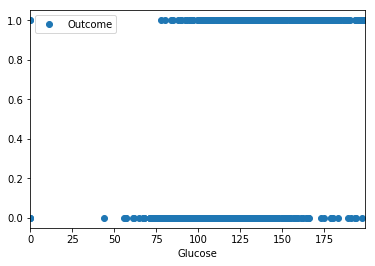

In [10]:
Diabetes.plot(x="Glucose", y= "Outcome", style = 'o')
# we can see from the graph, the output is just two straight lines, the data output is not continuous. 

### Predicting by logistic regression model

In [ ]:
# Using sigmoid function, sigmoid(z)= 1/1+e^-z; z= m*x+b; e = Euler's number

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(Diabetes[["Pregnancies", "Glucose",  "BloodPressure",  "SkinThickness",  "Insulin",   "BMI", "DiabetesPedigreeFunction",  "Age"]], Diabetes.Outcome,test_size=0.01)

In [27]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, **options)
    Split arrays or matrices into random train and test subsets
    
    Quick utility that wraps input validation and
    ``next(ShuffleSplit().split(X, y))`` and application to input data
    into a single call for splitting (and optionally subsampling) data in a
    oneliner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float, int or None, optional (default=0.25)
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to the
        complement of the train size. By default, 

In [13]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
736,0,126,86,27,120,27.4,0.515,21
715,7,187,50,33,392,33.9,0.826,34
421,2,94,68,18,76,26.0,0.561,21
206,8,196,76,29,280,37.5,0.605,57
367,0,101,64,17,0,21.0,0.252,21
24,11,143,94,33,146,36.6,0.254,51
439,6,107,88,0,0,36.8,0.727,31
12,10,139,80,0,0,27.1,1.441,57


In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
model = LogisticRegression()

In [16]:
# Train the Dragon
model.fit(X_train, y_train)

C:\Users\mohammed.shuvo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [17]:
model.predict(X_test)

array([0, 1, 0, 1, 0, 1, 0, 1], dtype=int64)

In [18]:
model.predict([[6,148, 72,35, 120, 33.6,  0.627, 50]])
# the model shows the prediction as "1"

array([1], dtype=int64)

### 3. Check Class imbalance:

[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'Out Come'),
 Text(0.5, 1.0, 'Check Class Imbalance')]

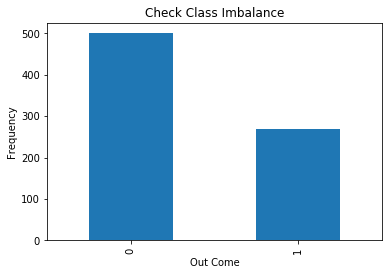

In [19]:
Diabetes["Outcome"].value_counts().plot('bar').set(title = "Check Class Imbalance", xlabel="Out Come", ylabel="Frequency") 

In [20]:
# It's imbalanced. Now let's find the percentage numerically:
Diabetes.Outcome.value_counts()[1]/Diabetes.Outcome.count()

0.3489583333333333

In [21]:
# From last row we can see almost 35% of the data sample gives positive diabetic test result. 
# But I think the imbalance is not significant here, at least not as significant compared to credit card fraud dataset.

### 4. Outlier analysis: 

In [22]:
### Outliers show us unusual data
# For this dataset, I think being pregnant for 15 times is not absurd becasue Pima Indian native tribe might
# have a higher rate of giving birth than usual Americans


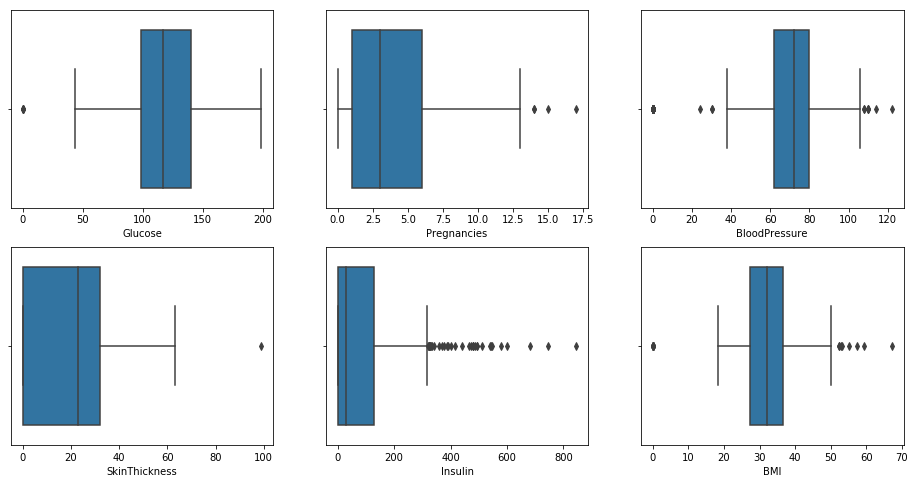

In [23]:
import seaborn as sns
fig, ax = plt.subplots(2,3, figsize = (16,8))
sns.boxplot(x = Diabetes["Glucose"], ax=ax[0,0])
sns.boxplot(x= Diabetes["Pregnancies"], ax=ax[0,1])
sns.boxplot(x= Diabetes["BloodPressure"], ax=ax[0,2])
sns.boxplot(x= Diabetes["SkinThickness"], ax=ax[1,0])
sns.boxplot(x= Diabetes["Insulin"], ax=ax[1,1])
sns.boxplot(x= Diabetes["BMI"], ax=ax[1,2])

In [24]:
# IQR score
Q1 = Diabetes.quantile(0.25)
Q3 = Diabetes.quantile(0.75)
IQR = Q3-Q1
print(IQR)


Pregnancies                   5.0000
Glucose                      41.2500
BloodPressure                18.0000
SkinThickness                32.0000
Insulin                     127.2500
BMI                           9.3000
DiabetesPedigreeFunction      0.3825
Age                          17.0000
Outcome                       1.0000
dtype: float64


In [25]:
#In the result, "True" values are outliers
print(((Diabetes < (Q1 - 1.5*IQR))) | ((Diabetes > (Q3 + 1.5*IQR))))


# I can replace the outliers by the following code, but I shouldn't do that because I think some anomaly in following medical data is expected!

# Diabetes_replaced = Diabetes [~((Diabetes < (Q1 - 1.5*IQR))) | ((Diabetes > (Q3 + 1.5*IQR))).any(axis=1)]


     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
0          False    False          False          False    False  False   
1          False    False          False          False    False  False   
2          False    False          False          False    False  False   
3          False    False          False          False    False  False   
4          False    False          False          False    False  False   
5          False    False          False          False    False  False   
6          False    False          False          False    False  False   
7          False    False           True          False    False  False   
8          False    False          False          False     True  False   
9          False    False          False          False    False   True   
10         False    False          False          False    False  False   
11         False    False          False          False    False  False   
12         False    False

### 6. Check Rare Values
Rare values are mostly taken in to consideration when the data is 'categorical'. Since in this dataset we are mostly dealing with numerical values, we can find the same result by analyzing outliers which we did on 4th answer.

### 7. Checking the records having Glucose between 100 to 200

In [26]:
# Separate the rows that has glucose between 100 to 200 and plot it against Outcome

Glucose_level_100_200 = Diabetes[(Diabetes['Glucose'] > 100) & (Diabetes ['Glucose'] < 200)]
Glucose_level_100_200.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1
10,4,110,92,0,0,37.6,0.191,30,0
11,10,168,74,0,0,38.0,0.537,34,1
12,10,139,80,0,0,27.1,1.441,57,0


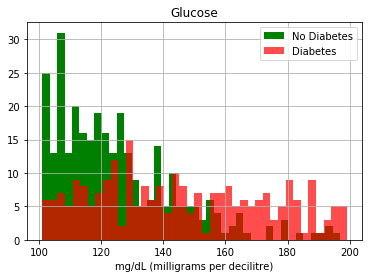

In [234]:
# Plotting the Glucose graph against outcome:
Glucose_level_100_200[Glucose_level_100_200.Outcome==0]["Glucose"].hist(color ='green', bins= 40).set(title = "Glucose", xlabel="mg/dL (milligrams per decilitre)") 
Glucose_level_100_200[Glucose_level_100_200.Outcome==1]["Glucose"].hist(color ='red', bins = 40, alpha = 0.7)
plt.legend(["No Diabetes", "Diabetes"])

### 5. Summerize the outcome

#### Number of pregnancies doesn't have much to do with Diabetes
#### More Diastolic Blood Pressure increases the chances of Diabetes
#### Having higher value of Pedegree function increases the chances of Diabetes meaning the genetic connection.
#### Having higher amount of Glucose means higher chances of Diabetes which is pretty clear from the graph.
#### As the age increases, chances of Diabetes become higher. A good number of young people have Diabetes too, so everyone need to do check ups irrespective of age.
#### People having less BMI are less likely to have Diabetes
#### 35% of Pima Indian females have Diabetes.
